# An introduction to root-finding

donner le package

In [1]:
func <- function(x) {
  x^3 - 2 * x - 5
}

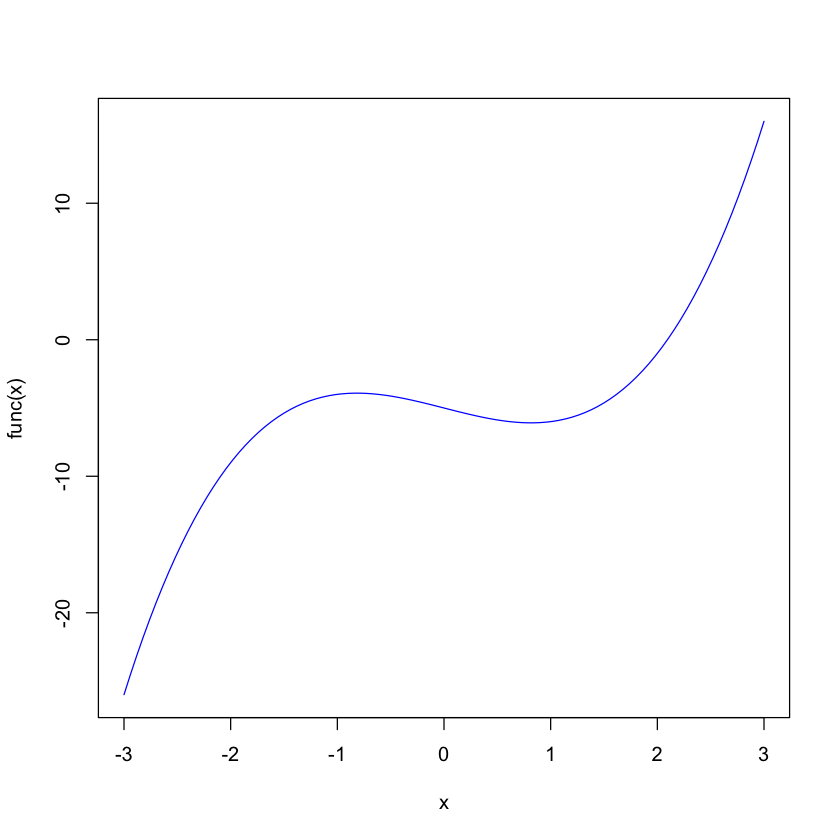

In [3]:
curve(func, xlim=c(-3,3), col='blue')
# curve(func, xlim=c(-3,3), col='blue', lwd=1.5, lty=2)
# abline(h=0)
# abline(v=0)

In [22]:
bisection <- function(f, a, b, n = 1000, tol = 1e-7) {
  # If the signs of the function at the evaluated points, a and b, stop the function and return message.
  if (!(f(a) < 0) && (f(b) > 0)) {
    stop('signs of f(a) and f(b) differ')
  } else if ((f(a) > 0) && (f(b) < 0)) {
    stop('signs of f(a) and f(b) differ')
  }
  
  for (i in 1:n) {
    c <- (a + b) / 2 # Calculate midpoint
    
    # If the function equals 0 at the midpoint or the midpoint is below the desired tolerance, stop the 
    # function and return the root.
    if ((f(c) == 0) || ((b - a) / 2) < tol) {
      return(c)
    }
    
    # If another iteration is required, 
    # check the signs of the function at the points c and a and reassign
    # a or b accordingly as the midpoint to be used in the next iteration.
    ifelse(sign(f(c)) == sign(f(a)), 
           a <- c,
           b <- c)
  }
  # If the max number of iterations is reached and no root has been found, 
  # return message and end function.
  print('Too many iterations')
}

In [23]:
bisection(func, 2, 3)

[1] 2.094552

$$\frac  {b-a}{2^{{n+1}}}$$

<pre> <b>Tant que</b> (<i>b</i> - <i>a</i>) &gt;&nbsp;<b>ε</b> 
    <i>m</i> ← (<i>a</i> + <i>b</i>) / 2
    <b>Si</b> (<i>f</i>(<i>a</i>)*<i>f</i>(<i>m</i>) ≤ 0) <b>alors</b>
       <i>b</i> ← <i>m</i>
    <b>sinon</b>
       <i>a</i> ← <i>m</i>
    <b>Fin</b>
 <b>Fin</b>
</pre>

In [10]:
bisec_w <-function(f, a, b, e=1e-7){
while (b-a > e) {
    m <- (a+b)/2
    ifelse(f(a)*f(m)<=0, b <- m, a <- m)
}
    return(m)
    }

In [11]:
bisec_w(func, 2, 3)

[1] 2.094552

In [ ]:
bisec <-function(f, a, b, tol=1e-7){
    for(i in 1:1000){
        c<-(a+b)/2
        if (f(c)==0 || ((b-a)/2)<tol){return(c)}
        ifelse(sign(f(c))==sign(f(a)), 
               a<-c, 
               b<-c)
    }
}

In [27]:
bisec(func, 2, 3)

[1] 2.094552

## Newton Raphson

In [31]:
# install.packages("numDeriv")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [32]:

newton.raphson <- function(f, a, b, tol = 1e-5, n = 1000) {
require(numDeriv) # Package for computing f'(x)
x0 <- a # Set start value to supplied lower bound
k <- n # Initialize for iteration results
# Check the upper and lower bounds to see if approximations result in 0
fa <- f(a)
if (fa == 0.0) {
return(a)
}
fb <- f(b)
if (fb == 0.0) {
return(b)
}
for (i in 1:n) {
dx <- genD(func = f, x = x0)$D[1] # First-order derivative f'(x0)
x1 <- x0 - (f(x0) / dx) # Calculate next value x1
k[i] <- x1 # Store x1
# Once the difference between x0 and x1 becomes sufficiently small, output the results.
if (abs(x1 - x0) < tol) {
root.approx <- tail(k, n=1)
res <- list('root approximation' = root.approx, 'iterations' = k)
return(res)
}
# If Newton-Raphson has not yet reached convergence set x1 as x0 and continue
x0 <- x1
}
print('Too many iterations in method')
}


In [33]:
newton.raphson(func, 2, 3)

Loading required package: numDeriv


$`root approximation`
[1] 2.094551

$iterations
[1] 2.100000 2.094568 2.094551 2.094551

In [49]:
fonction <- function(x) {
  x^3 - 2 * x - 5
}

In [60]:
newton.raphson <- function(f, a, b, tol = 1e-5, n = 1000) {
    require(numDeriv)
    x0<-a
    k<-n
    for (i in 1:n){
        dx <-genD(func=f, x=x0)$D[1]
        x1<-x0-(f(x0)/dx)
        k[i]<-x1
        if (abs(x1 - x0) < tol) {
            return(k[i])
        }
        x0<-x1
    }
}
    

In [61]:
newton.raphson(fonction, 2, 3, n=1000)

[1] 2.094551

In [41]:
func(2)

[1] -1

In [65]:
print(genD(func=fonction, x=4))

$D
     [,1] [,2]
[1,]   46   24

$p
[1] 1

$f0
[1] 51

$func
function (x) 
{
    x^3 - 2 * x - 5
}

$x
[1] 4

$d
[1] 1e-04

$method
[1] "Richardson"

$method.args
$method.args$eps
[1] 1e-04

$method.args$d
[1] 1e-04

$method.args$zero.tol
[1] 1.781029e-05

$method.args$r
[1] 4

$method.args$v
[1] 2


attr(,"class")
[1] "Darray"


# Compute Numerical Integrals

In [12]:
fonction <- function(x) {1/((x+1)*sqrt(x))}

\begin{equation}\label{eq:}
\int_{0}^{\inf} \frac{1}{(x+1)\sqrt{x}} dx
\end{equation}


In [14]:
integrate(fonction, lower = 0, upper = Inf)

3.141593 with absolute error < 2.7e-05

\begin{equation}\label{eq:2}
\int_{-1.96}^{1.96} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}dx
\end{equation}


In [15]:
f <- function(x) {1/sqrt(2*pi)*exp(-x^2/2)}
integrate(f, lower = -1.96, upper = 1.96)

0.9500042 with absolute error < 1e-11